In [1]:
import pandas as pd
train=pd.read_csv('C:\\Users\\Maram\\Desktop\\GoMyCode\\Train_loan_Home.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [120]:
### dataset has 13 columns and 614 rows.
### Columns and what they are for:
###Loan_ID:Unique Loan ID
###Gender:Male/ Female
###Married:Applicant married (Y/N)
###Dependents:Number of dependents
###Education:Applicant Education (Graduate/ Under Graduate)
###Self_Employed:Self employed (Y/N)
###ApplicantIncome:Applicant income
###CoapplicantIncome:Coapplicant income
###LoanAmount:Loan amount in thousands
###Loan_Amount_Term:Term of loan in months
###Credit_History:credit history meets guidelines
###Property_Area:Urban/ Semi Urban/ Rural
###Loan_Status:Loan approved (Y/N)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train = train.reset_index()

In [5]:
num_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Loan_Amount_Term']
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term']


### 'Credit_History','Loan_Amount_Term' even if they are categorical data we will for now treat them as numerical to deal with the missing values and later on we will continue our work with it being dealt as categorical data 

In [6]:
train= train.drop(columns=['Loan_ID'])

### we dropped the ID column because it doesn't serve us at this stage anything and doesn't add to the prediction so it would be easier to deal with the dataset without it
### we split the other columns into categorical and numerical colums to make our work with them much easier

In [7]:
train.isnull().sum()

index                 0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### we will be working on preprocessing the data and dealing with the missing data

In [8]:
train_encoded = pd.get_dummies(train,drop_first=True)
train_encoded.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [9]:
train.dropna(axis=1,how='all')

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
train[num_col] = train[num_col].fillna(train.mean())

In [11]:
train.isnull().sum()

index                 0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
most_occuring_gender=len(train['Gender'])
print("Most occuring gender : ", most_occuring_gender)
print(train['Gender'].value_counts())

Most occuring gender :  614
Male      489
Female    112
Name: Gender, dtype: int64


In [13]:
train['Gender'].fillna('Male', inplace=True)

In [14]:
status=len(train['Married'])
print("Marital status : ", status)
print(train['Married'].value_counts())

Marital status :  614
Yes    398
No     213
Name: Married, dtype: int64


In [15]:
train['Married'].fillna('Yes', inplace=True)

In [16]:
number_of_dependents=len(train['Dependents'])
print("Number of dependents : ", number_of_dependents)
print(train['Dependents'].value_counts())

Number of dependents :  614
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [17]:
train['Dependents'].fillna('0', inplace=True)

In [18]:
job_status=len(train['Self_Employed'])
print("Are you self employer : ", job_status)
print(train['Self_Employed'].value_counts())

Are you self employer :  614
No     500
Yes     82
Name: Self_Employed, dtype: int64


In [19]:
train['Self_Employed'].fillna('No', inplace=True)

In [20]:
train.isnull().sum().sum()

0

In [21]:
y = train_encoded['Loan_Status_Y']
X = train_encoded.drop(columns='Loan_Status_Y')

In [22]:
train_encoded.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [23]:
train.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

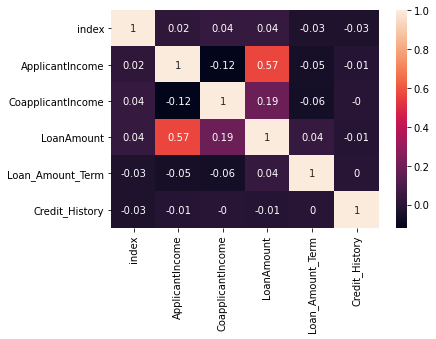

In [58]:
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

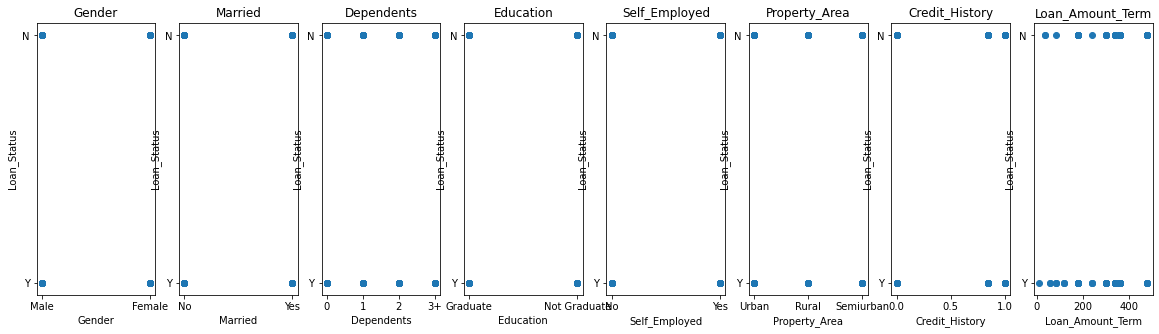

In [62]:
plt.figure(figsize=(20, 5))

features =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
target = train['Loan_Status']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Loan_Status')

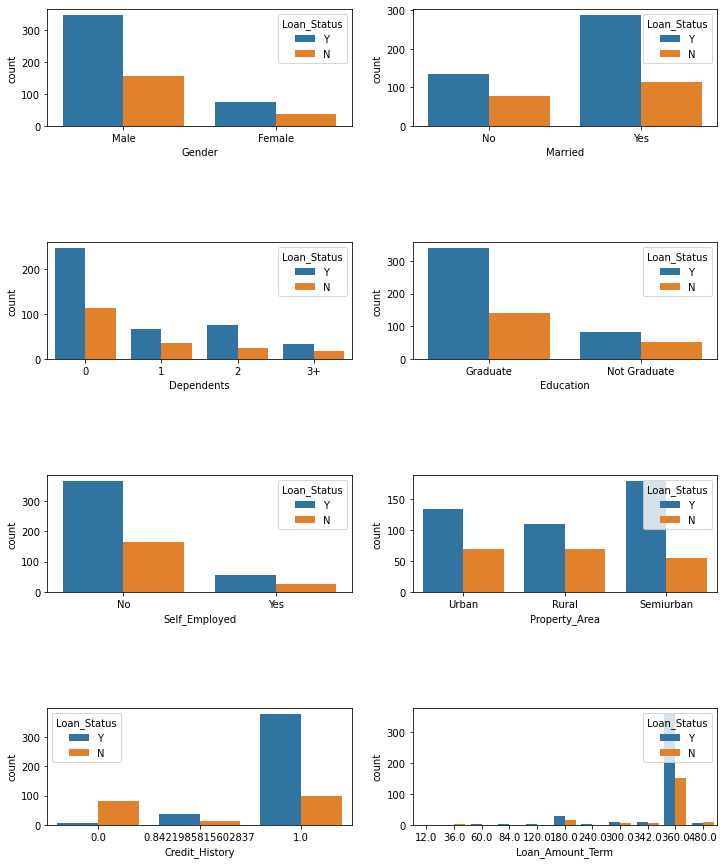

In [25]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat,data=train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

### we can see that about of 2/3 of applicants were granted loans
### we have 3 times the number of men compared to women
### we have more married applicants than not married and they are more likely to get loans
### the majority have no dependents and also they are more likely to get loans
### graduates are more likely to get loans
### applicants from smiurban areas are more likely to get loans
### applicants with credit history are far more likely to be accepted
### majority of the loans taken are for 360 Months


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


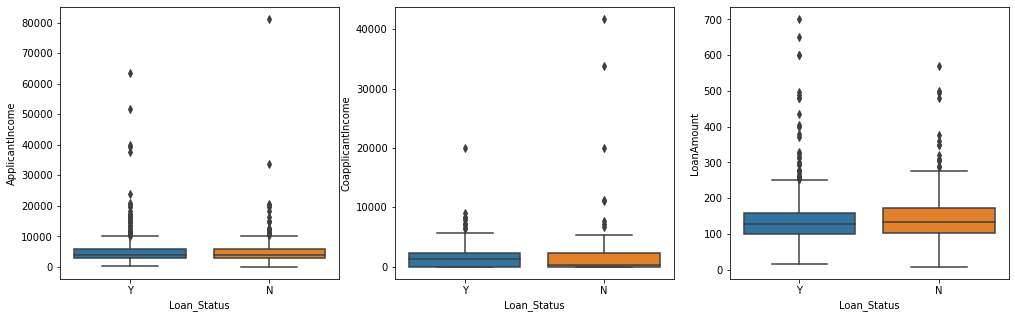

In [26]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

### numerical data has no significant influence on whether you are more likely to get accepted or not

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [28]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [32]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6400804026684188
Validation Mean Accuracy:  0.6823129251700679


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.3892105911067126
R2 score is 0.2963095422759061


In [71]:
y_test_predict = lin_model.predict(X_test_imp)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.3464193335655708
R2 score is 0.4379021239094778


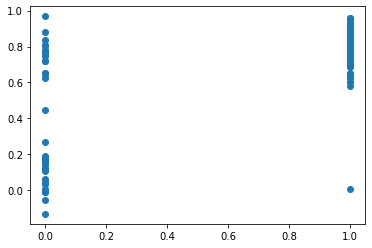

In [95]:
plt.scatter(y_test, y_test_predict)
plt.show()

In [96]:
import numpy as np
np.any(np.isnan(X_test))

True

In [97]:
np.all(np.isfinite(X_test))

False

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

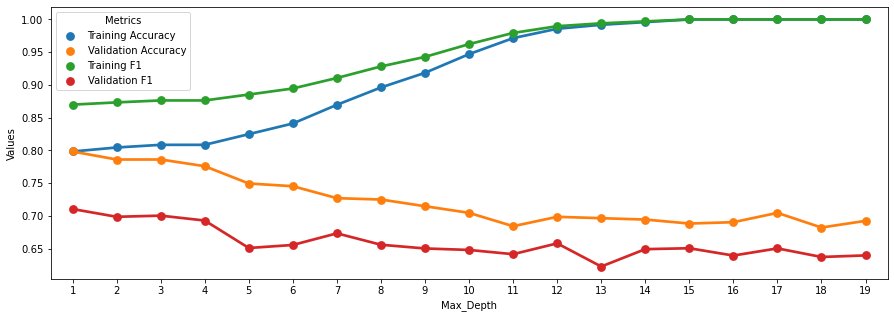

In [98]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)    

In [99]:
### max depth = 3 is the optimal choice since its accuracy is around 0.8

### Visulazing Decision Tree

In [100]:
import graphviz 
from sklearn import tree

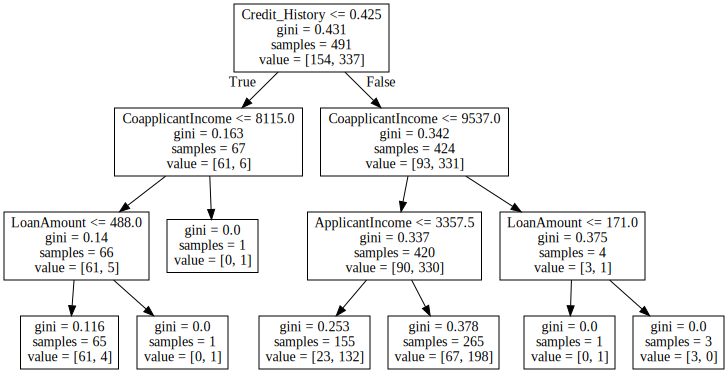

In [101]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [102]:
 ### our classifier might be overfited since some leafs have less than 5 samples

### we will be working on improving our test accuracy

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

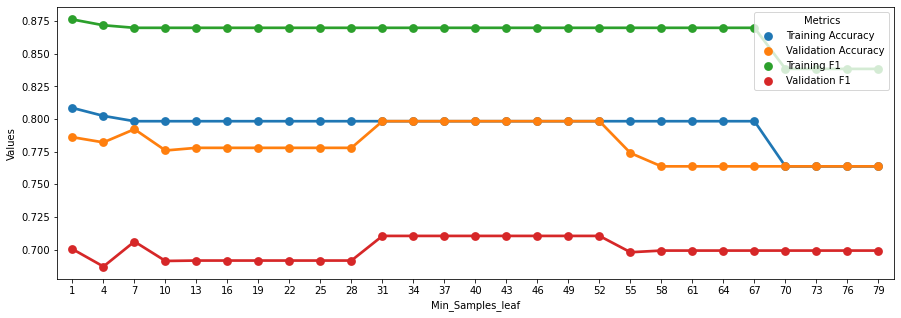

In [103]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [104]:
### we will choose Min_Samples_leaf=35 to improve test accuracy

In [105]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


### Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.868766404199475
Train Accuracy  0.7963340122199593
Validation Mean F1 Score:  0.6904788201741832
Validation Mean Accuracy:  0.79428983714698


In [107]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8455284552845529
Test F1 Score:  0.8983957219251337
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,20,18,38
1,1,84,85
All,21,102,123


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

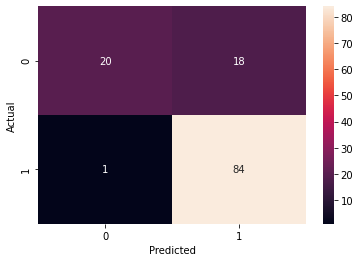

In [108]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [109]:
### Random Forest gives same results as Decision Tree Classifier

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

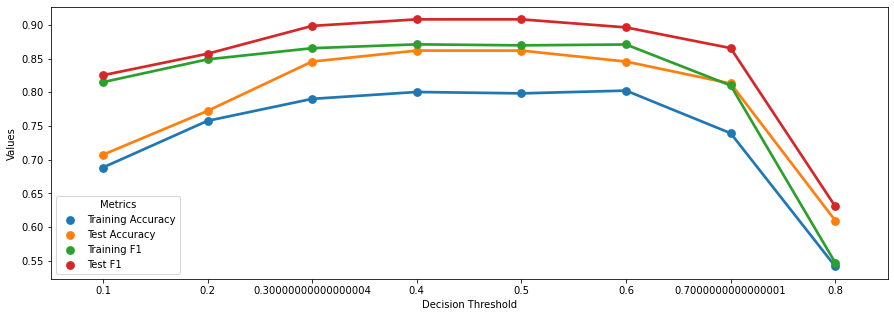

In [111]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []
for thresh in np.arange(0.1,0.9,0.1): 
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)    

In [112]:
### Logistic Regression does slightly better than Decision Tree and Random Forest. we take threshold=0.5.

In [113]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test_imp))

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


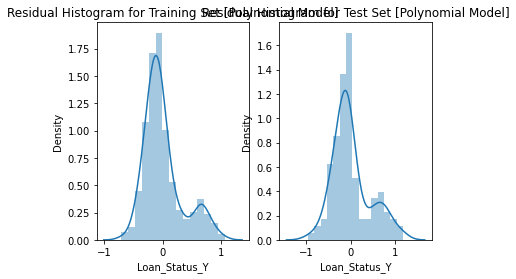

In [114]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\se

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Maram\anaconda3\lib

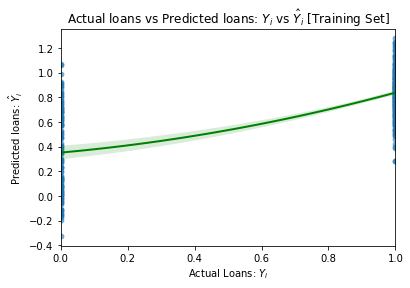

In [115]:
sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Loans: $Y_i$")
plt.ylabel("Predicted loans: $\hat{Y}_i$")
plt.title("Actual loans vs Predicted loans: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

In [116]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the test set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the test set
RMSE of training set is 0.33267586401635324
R2 score of training set is 0.48589130444456496


In [117]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 0.42332581175711104
R2 score of test set is 0.1606227382875136


In [118]:
thresh = 0.5
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


In [119]:
### the accuracy found between all 3 models used is almost equal accuracy~86%

In [94]:
### all three models in this dataset could be used to improve the accuracy since all of them have the same result